In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy import stats
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
def summarize_beta(alpha, beta):
    """Summarize a Beta Model for \eqn{\pi}

    @param alpha,beta positive shape parameters of the Beta model

    Return Pandas Series with summary
    """

    mean = alpha / (alpha + beta)
    var = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    sd = np.sqrt(var)

    if alpha < 1 and beta < 1:
        mode = "0 and 1"
    elif alpha <= 1 and beta > 1:
        mode = 0
    elif alpha > 1 and beta < 1:
        mode = 1
    else:
        mode = (alpha - 1) / (alpha + beta - 2)
    return pd.Series({"mean": mean, "mode": mode, "var": var, "sd": sd})

In [4]:
summarize_beta(alpha=2, beta=2)

mean    0.500000
mode    0.500000
var     0.050000
sd      0.223607
dtype: float64

In [5]:
li = stats.beta.ppf(0.03, 2, 2)
ls = stats.beta.ppf(0.97, 2, 2)
list([li, ls])

[0.10364483924951279, 0.8963551607504872]

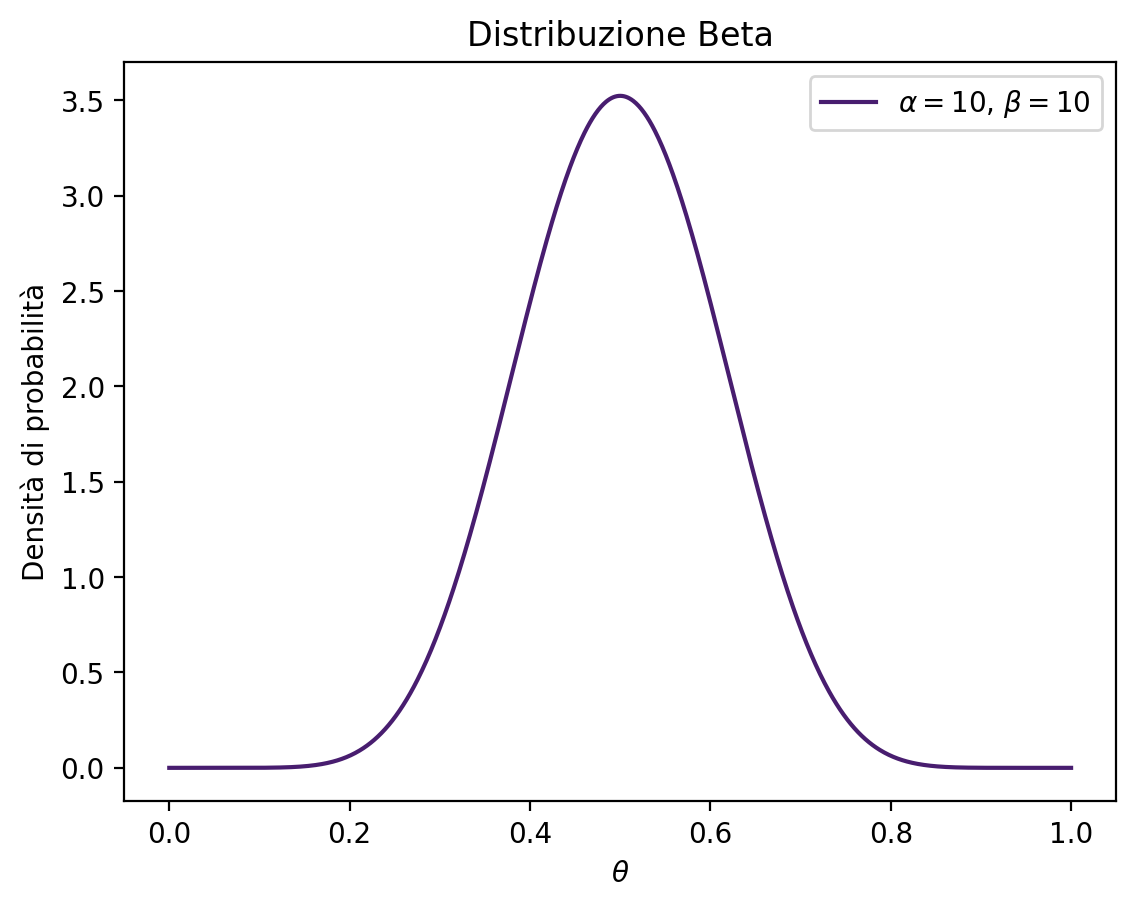

In [6]:
# Crea un array di valori di theta
theta = np.linspace(0, 1, 1000)
pdf_pre = stats.beta.pdf(theta, 10, 10)
plt.plot(theta, pdf_pre, label=r'$\alpha=10$, $\beta=10$')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione Beta')
plt.legend()
plt.show()

In [7]:
li = stats.beta.ppf(0.03, 10, 10)
ls = stats.beta.ppf(0.97, 10, 10)
list([li, ls])

[0.2964110284916252, 0.7035889715083747]

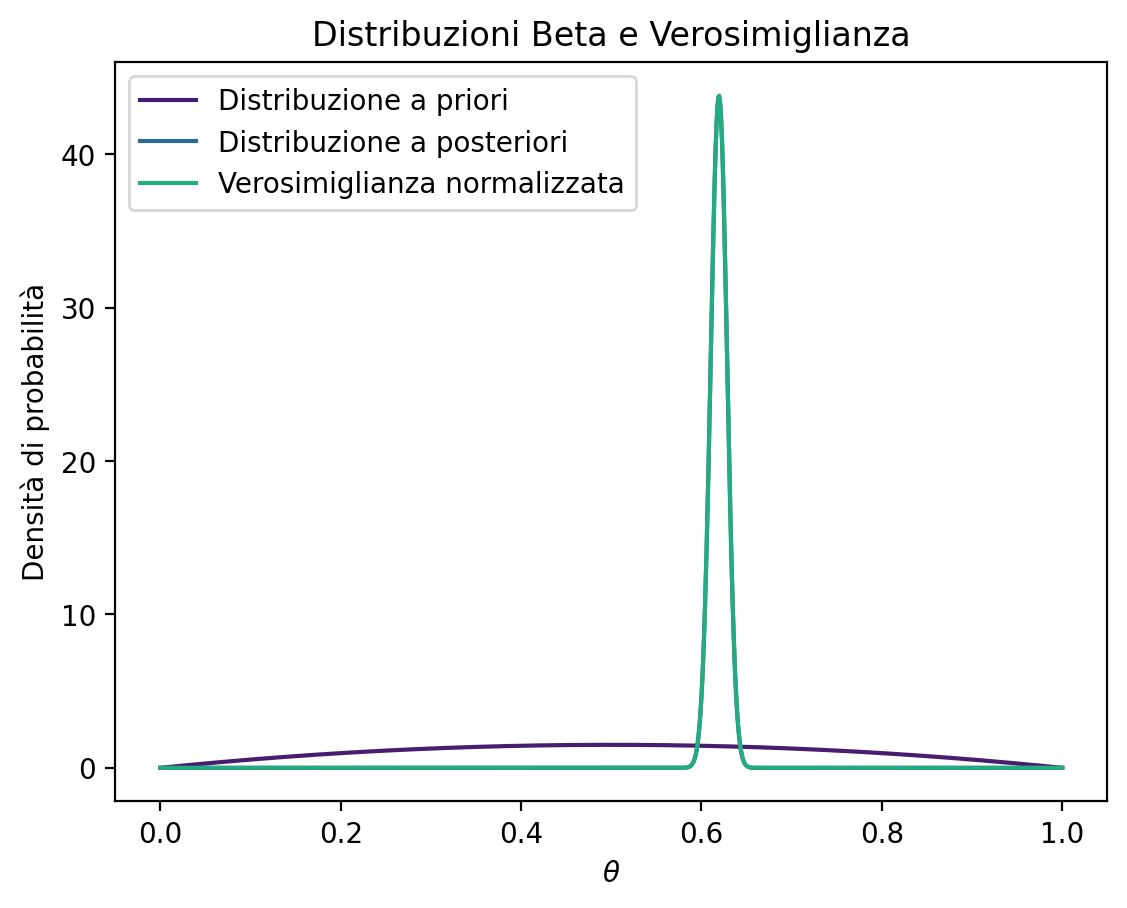

In [8]:
y = 1761
n = 2843

# Parametri delle distribuzioni beta
alpha_pre = 2
beta_pre = 2

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r"Distribuzione a priori")
plt.plot(theta, pdf_post, label=r"Distribuzione a posteriori")
plt.plot(theta, normalized_likelihood, label=r"Verosimiglianza normalizzata")
plt.xlabel(r"$\theta$")
plt.ylabel("Densità di probabilità")
plt.title("Distribuzioni Beta e Verosimiglianza")
plt.legend()
plt.show()

In [9]:
summarize_beta(1763, 1084)

mean    0.619248
mode    0.619332
var     0.000083
sd      0.009099
dtype: float64

In [10]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

In [11]:
[.62 - stats.norm.ppf(0.97) * 0.0091, .62 + stats.norm.ppf(0.97) * 0.0091]

[0.6028847781658236, 0.6371152218341763]

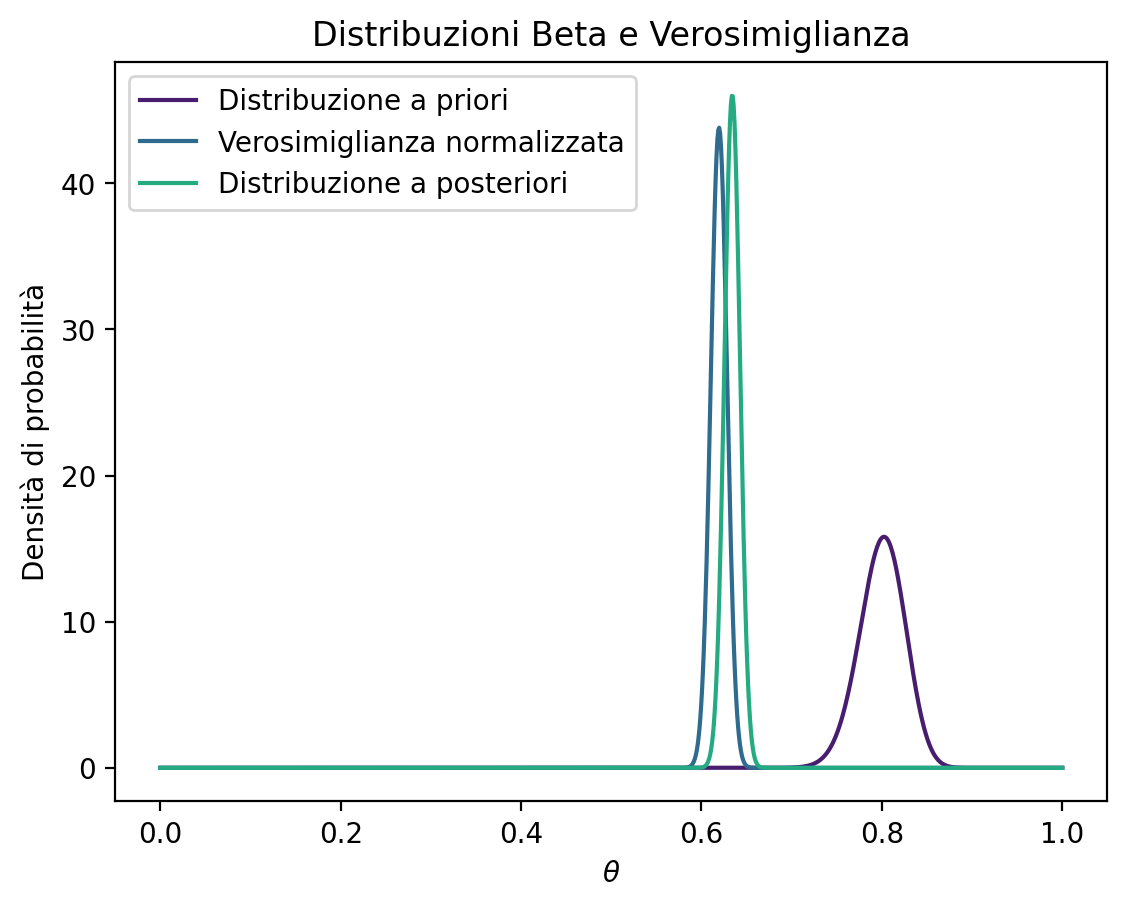

In [12]:
y = 1761
n = 2843

# Parametri delle distribuzioni beta
alpha_pre = 200
beta_pre = 50

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzioni Beta e Verosimiglianza')
plt.legend()
plt.show()

In [13]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

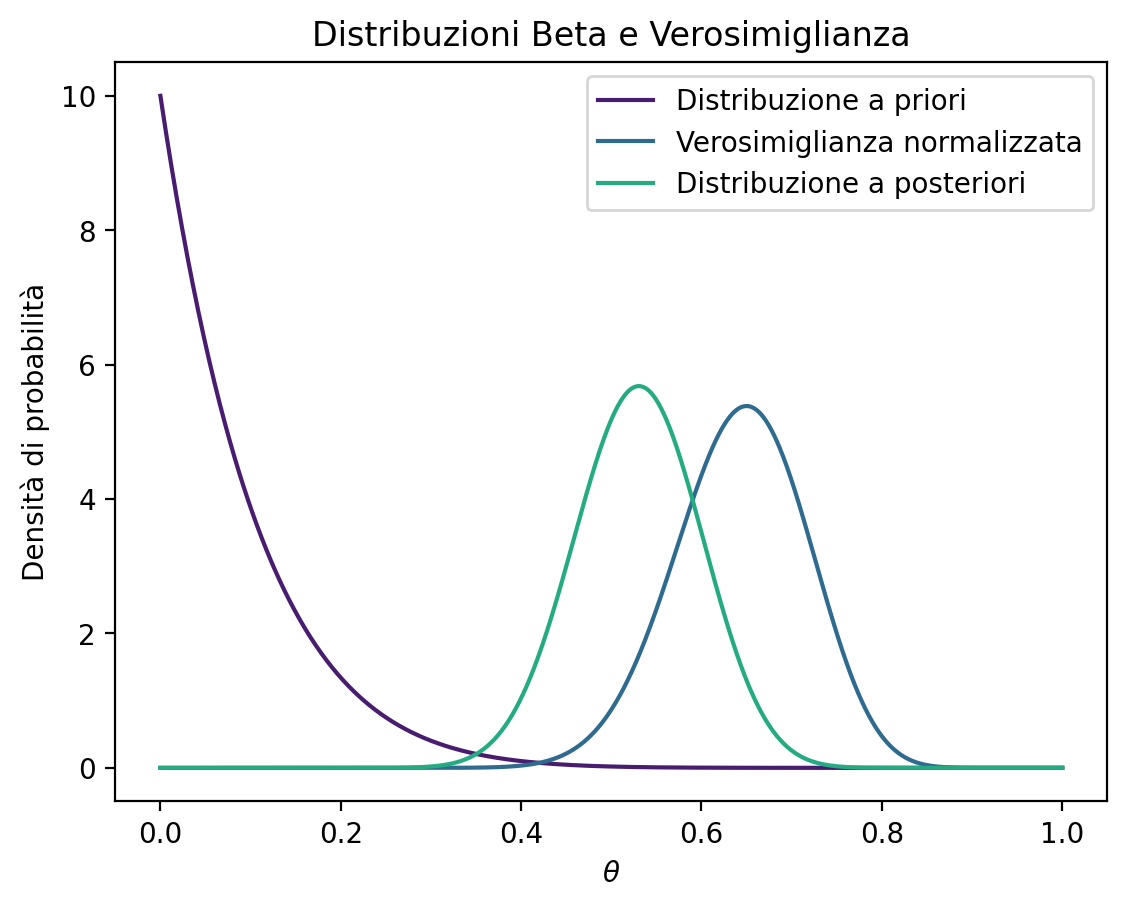

In [14]:
y = 26
n = 40

# Parametri delle distribuzioni beta
alpha_pre = 1
beta_pre = 10

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzioni Beta e Verosimiglianza')
plt.legend()
plt.show()

In [15]:
li = stats.beta.ppf(0.03, 1 + 26, 10 + 40 - 26)
ls = stats.beta.ppf(0.97, 1 + 26, 10 + 40 - 26)
list([li, ls])

[0.3986201110959706, 0.6582462555099745]

In [16]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

pandas    : 2.0.3
numpy     : 1.25.2
scipy     : 1.10.1
arviz     : 0.16.0
matplotlib: 3.7.2
seaborn   : 0.12.2

